# This is the code to calculate Hubble Constant using SHOES data 
### Hubble Constant was first formulated by Edwin Hubble in his grondbreaking paper in 1929, it tells us that Universe is not static but expanding and the more further the object , the greater is expansion i.e The more farther they're the faster the move away from refernce point (here Earth)

In [14]:
# Importing Libraries 
#You can download them if not installed in system using $pip install (library name : numpy / astropy / pandas / matplotlib )

import warnings
import numpy as np
import matplotlib.pyplot as plt

# Ignore all warnings
warnings.filterwarnings("ignore")

In [8]:
import pandas as pd

# Read the .dat file (space-delimited)
df = pd.read_csv("PantheonSH0ES.dat", delim_whitespace=True)

# Save as .csv
df.to_csv("PantheonSH0ES_sample.csv", index=False)

print("Conversion complete! Saved as PantheonSH0ES_sample.csv")


Conversion complete! Saved as PantheonSH0ES_sample.csv


In [13]:
# all Header coloumn names 
print(df.columns)

Index(['CID', 'IDSURVEY', 'zHD', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL',
       'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG', 'MU_SH0ES',
       'MU_SH0ES_ERR_DIAG', 'CEPH_DIST', 'IS_CALIBRATOR', 'USED_IN_SH0ES_HF',
       'c', 'cERR', 'x1', 'x1ERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c',
       'COV_x1_x0', 'COV_c_x0', 'RA', 'DEC', 'HOST_RA', 'HOST_DEC',
       'HOST_ANGSEP', 'VPEC', 'VPECERR', 'MWEBV', 'HOST_LOGMASS',
       'HOST_LOGMASS_ERR', 'PKMJD', 'PKMJDERR', 'NDOF', 'FITCHI2', 'FITPROB',
       'm_b_corr_err_RAW', 'm_b_corr_err_VPEC', 'biasCor_m_b',
       'biasCorErr_m_b', 'biasCor_m_b_COVSCALE', 'biasCor_m_b_COVADD'],
      dtype='object')


Estimated Hubble constant: 70.64 ± 4.88 km/s/Mpc


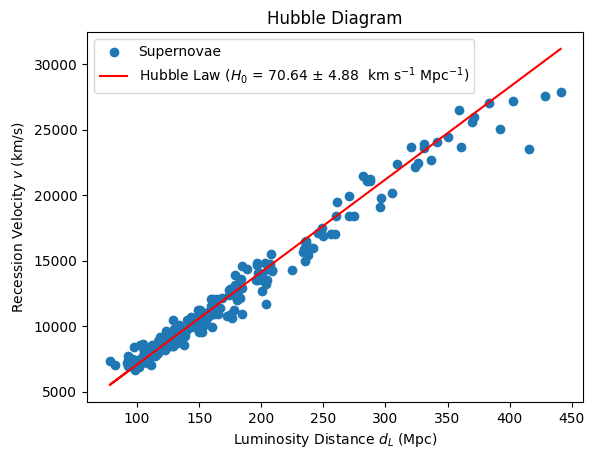

In [28]:
#changing dataframe name to --- data ---
data = df 

# Filter for Hubble flow SNe (z > 0.02 and USED_IN_SH0ES_HF == 1)
hf = data[((data['zCMB'] > 0.02) & (data['zCMB'] <= 0.1)) & (data['USED_IN_SH0ES_HF'] == 1)]

# Calculate luminosity distance in Mpc from distance modulus
hf['d_L_Mpc'] = 10 ** ((hf['MU_SH0ES'] - 25) / 5)

# Calculate recession velocity (v = c * z)
c = 299792  # speed of light in km/s because d_L in Mpc
hf['v_kms'] = c * hf['zCMB']

# Calculate Hubble constant for each SN
hf['H0_SN'] = hf['v_kms'] / hf['d_L_Mpc']

# Estimate H0 as the mean value
H0_mean = hf['H0_SN'].mean()
H0_std = hf['H0_SN'].std()
print(f"Estimated Hubble constant: {H0_mean:.2f} ± {H0_std:.2f} km/s/Mpc")

# Optional: Plot v vs. d_L to visualize Hubble's Law
plt.scatter(hf['d_L_Mpc'], hf['v_kms'], label='Supernovae')
plt.plot(hf['d_L_Mpc'], H0_mean * hf['d_L_Mpc'], color='red', label=(
    f'Hubble Law ($H_0$ = {H0_mean:.2f} ± {H0_std:.2f} '
    r'$\ \mathrm{km \ s^{-1} \ Mpc^{-1}}$)')
        )

plt.xlabel('Luminosity Distance $d_L$ (Mpc)')
plt.ylabel('Recession Velocity $v$ (km/s)')
plt.legend()
plt.title('Hubble Diagram')
plt.show()